In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

# Load csv dataset to a pandas dataframe
df = pd.read_csv("data/BlackFriday.csv")

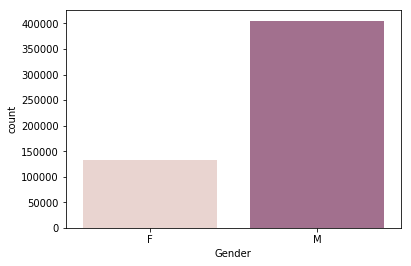

In [11]:
# Visualize demographics - Male/female
sns.countplot(df['Gender'], palette=sns.cubehelix_palette(3))

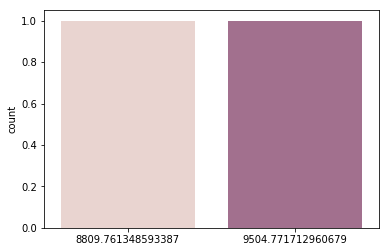

In [21]:
# visualize relative amount spent bought by male and females
m_count = df[df['Gender']=='M'].count()[0]
f_count = df[df['Gender']=='F'].count()[0]


# plot distribution of purchases
m_amount = df[df.Gender == 'M'].Purchase.sum() / m_count
f_amount = df[df.Gender == 'F'].Purchase.sum() / f_count

# Plot graph
sns.countplot([m_amount, f_amount], palette=sns.cubehelix_palette(3))